<img src="https://shwetkm.github.io/upxlogo.png"></img>

# Exploratory Data Analysis using Python(Part 02) - Data Science Foundation


**SET THE WORKING DIRECTORY SO THAT WE DO NOT HAVE TO THINK ABOUT PATH PROBLEMS**

Please ensure all your folder names <font color='red'><b>do not have a space & use forward slash (/)</b></font>

In [1]:
your_local_path="C:/Users/tejks/Desktop/ML/practice/"

Techniques/questions to look at in this module:
<b><i>
+ How to merge datasets and different merge techniques
+ List of movies that are rated most by users
+ In ratings, how to address ratings sparsity problem
+ Plot distributions
+ Identify different age groups and technique of binning
+ Subgrouping and unstacking
+ Differences in ratings by gender
</b></i>

In [2]:
import pandas as pd
import numpy as np

In [11]:
# Pass column names in names for each CSV

# Load the users data
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv(your_local_path+'u.user', sep='|', names=u_cols,
                    encoding='UTF-8')

# Load the ratings data
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(your_local_path+'u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols

# Load the movies data
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv(your_local_path+'u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin1')
movies.head()
#ratings.head()
#users.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [6]:
# Check the structure of Users data
users
users.shape

(943, 5)

In [7]:
# Check few sample values of user data
users.head(20)

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [8]:
# Get information on user data
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
sex           943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB


In [9]:
# Get data type information of movies data
movies.dtypes

movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
dtype: object

In [12]:
# Describe the spread of the users data
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [13]:
# Get sample movie ids
movies['title'].head(30)

0                                      Toy Story (1995)
1                                      GoldenEye (1995)
2                                     Four Rooms (1995)
3                                     Get Shorty (1995)
4                                        Copycat (1995)
5     Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6                                 Twelve Monkeys (1995)
7                                           Babe (1995)
8                               Dead Man Walking (1995)
9                                    Richard III (1995)
10                                 Seven (Se7en) (1995)
11                           Usual Suspects, The (1995)
12                              Mighty Aphrodite (1995)
13                                   Postino, Il (1994)
14                            Mr. Holland's Opus (1995)
15                   French Twist (Gazon maudit) (1995)
16                           From Dusk Till Dawn (1996)
17                            White Balloon, The

In [14]:
# Selecting a subset of columns from the movies data
movies[['movie_id','title']].head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [15]:
# Another example of subsetting (Putting a condition)
users[users.age<40].tail(20)

,user_id,age,sex,occupation,zip_code
912,913,27,M,student,76201
915,916,27,M,engineer,N2L5N
916,917,22,F,student,20006
918,919,25,M,other,14216
919,920,30,F,artist,90008
920,921,20,F,student,98801
921,922,29,F,administrator,21114
922,923,21,M,student,E2E3R
923,924,29,M,other,11753
924,925,18,F,salesman,49036


In [16]:
# More conditions
users[(users.age < 40) & (users.sex == 'F')].head(3)

,user_id,age,sex,occupation,zip_code
4,5,33,F,other,15213
10,11,39,F,other,30329
11,12,28,F,other,06405


In [17]:
# Create the index for the users dataset. Can run only once, do not run more than once, else you shall get an error.
users.set_index('user_id', inplace=True)
users.head()

,age,sex,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [18]:
# If you wish then please reset the index
users.reset_index(inplace=True)
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [22]:
# Merge datasets - Movies, ratings & users
#print (movies.head())    # movie_id
#print (users.head())     # user_id

movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)

movie_ratings.head(500)
lens.head(450)

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076
5,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,308,4,887737194,60,M,retired,95076
6,11,Seven (Se7en) (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Se7en%20(1995),308,5,887737837,60,M,retired,95076
7,12,"Usual Suspects, The (1995)",14-Aug-1995,NaN,http://us.imdb.com/M/title-exact?Usual%20Suspe...,308,5,887737243,60,M,retired,95076
8,15,Mr. Holland's Opus (1995),29-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Mr.%20Holland...,308,3,887739426,60,M,retired,95076
9,17,From Dusk Till Dawn (1996),05-Feb-1996,NaN,http://us.imdb.com/M/title-exact?From%20Dusk%2...,308,4,887739056,60,M,retired,95076


In [23]:
lens.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076


In [25]:
# Let us answer some simple questions now. 
# Most rated movies

most_rated = lens.groupby('title').size()
most_rated

title
'Til There Was You (1997)                                     9
1-900 (1994)                                                  5
101 Dalmatians (1996)                                       109
12 Angry Men (1957)                                         125
187 (1997)                                                   41
2 Days in the Valley (1996)                                  93
20,000 Leagues Under the Sea (1954)                          72
2001: A Space Odyssey (1968)                                259
3 Ninjas: High Noon At Mega Mountain (1998)                   5
39 Steps, The (1935)                                         59
8 1/2 (1963)                                                 38
8 Heads in a Duffel Bag (1997)                                4
8 Seconds (1994)                                              4
A Chef in Love (1996)                                         8
Above the Rim (1994)                                          5
Absolute Power (1997)             

In [26]:
# Another way to get the mentions. value_counts: The resulting object will be in descending order so that the first element is the most frequently-occurring 
lens.title.value_counts()[:20]

Star Wars (1977)                    583
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
Toy Story (1995)                    452
Air Force One (1997)                431
Independence Day (ID4) (1996)       429
Raiders of the Lost Ark (1981)      420
Godfather, The (1972)               413
Pulp Fiction (1994)                 394
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Jerry Maguire (1996)                384
Chasing Amy (1997)                  379
Rock, The (1996)                    378
Empire Strikes Back, The (1980)     367
Star Trek: First Contact (1996)     365
Name: title, dtype: int64

In [28]:
# Highest rated movies
lens.groupby('title').agg(np.size)

highest_ratings = lens.groupby('title').agg({'rating':[np.size,np.mean]})
highest_ratings.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

In [29]:
# Let us sort the output and see what we get
highest_ratings.sort_values([('rating', 'mean')], ascending=False).head(15)

rating       
                                                    size   mean
title                                                          
They Made Me a Criminal (1939)                         1  5.000
Marlene Dietrich: Shadow and Light (1996)              1  5.000
Saint of Fort Washington, The (1993)                   2  5.000
Someone Else's America (1995)                          1  5.000
Star Kid (1997)                                        3  5.000
Great Day in Harlem, A (1994)                          1  5.000
Aiqing wansui (1994)                                   1  5.000
Santa with Muscles (1996)                              2  5.000
Prefontaine (1997)                                     3  5.000
Entertaining Angels: The Dorothy Day Story (1996)      1  5.000
Pather Panchali (1955)                                 8  4.625
Some Mother's Son (1996)                               2  4.500
Maya Lin: A Strong Clear Vision (1994)                 4  4.500
Anna (1996)                                            2  4.500
Everest (1998)                                         2  4.500

In [32]:
# We shall consider movies that have been rated more than 100 times

atleast_100 = highest_ratings['rating']['size'] >= 200

highest_ratings[atleast_100].sort_values([('rating', 'mean')], ascending=False)[:15]



rating          
                                         size      mean
title                                                  
Schindler's List (1993)                   298  4.466443
Casablanca (1942)                         243  4.456790
Shawshank Redemption, The (1994)          283  4.445230
Rear Window (1954)                        209  4.387560
Usual Suspects, The (1995)                267  4.385768
Star Wars (1977)                          583  4.358491
To Kill a Mockingbird (1962)              219  4.292237
One Flew Over the Cuckoo's Nest (1975)    264  4.291667
Silence of the Lambs, The (1991)          390  4.289744
Godfather, The (1972)                     413  4.283293
Raiders of the Lost Ark (1981)            420  4.252381
Titanic (1997)                            350  4.245714
Empire Strikes Back, The (1980)           367  4.204360
Boot, Das (1981)                          201  4.203980
Godfather: Part II, The (1974)            209  4.186603

In [33]:
import matplotlib.pyplot as plt
% matplotlib inline 

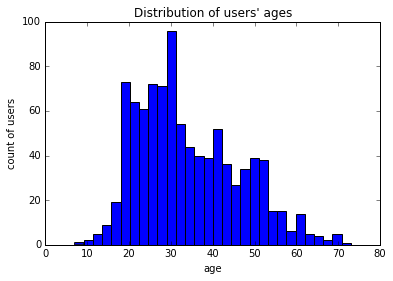

In [34]:
# Lets plot the user age and count

users.age.plot.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');

In [36]:
# How to get the 397 th user's age
lens
#lens['age'][397]

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076
5,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,308,4,887737194,60,M,retired,95076
6,11,Seven (Se7en) (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Se7en%20(1995),308,5,887737837,60,M,retired,95076
7,12,"Usual Suspects, The (1995)",14-Aug-1995,NaN,http://us.imdb.com/M/title-exact?Usual%20Suspe...,308,5,887737243,60,M,retired,95076
8,15,Mr. Holland's Opus (1995),29-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Mr.%20Holland...,308,3,887739426,60,M,retired,95076
9,17,From Dusk Till Dawn (1996),05-Feb-1996,NaN,http://us.imdb.com/M/title-exact?From%20Dusk%2...,308,4,887739056,60,M,retired,95076


In [37]:
# Let us create buckets age-wise
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=True, labels=labels)
lens['age_group']
#lens.age

0        50-59
1        50-59
2        50-59
3        50-59
4        50-59
5        50-59
6        50-59
7        50-59
8        50-59
9        50-59
10       50-59
11       50-59
12       50-59
13       50-59
14       50-59
15       50-59
16       50-59
17       50-59
18       50-59
19       50-59
20       50-59
21       50-59
22       50-59
23       50-59
24       50-59
25       50-59
26       50-59
27       50-59
28       50-59
29       50-59
         ...  
99970    10-19
99971    10-19
99972    10-19
99973    10-19
99974    10-19
99975    10-19
99976    10-19
99977    10-19
99978    10-19
99979    10-19
99980    10-19
99981    10-19
99982    10-19
99983    10-19
99984    10-19
99985    10-19
99986    10-19
99987    10-19
99988    10-19
99989    10-19
99990    10-19
99991    10-19
99992    10-19
99993    10-19
99994    10-19
99995    10-19
99996    10-19
99997    10-19
99998    10-19
99999    10-19
Name: age_group, Length: 100000, dtype: category
Categories (8, object): [0-9 < 10-19

In [39]:
# Group these age buckets and check the rating behaviour. Check who has given max & min number of ratings
lens.groupby('age_group').agg({'rating': [np.size, np.mean]})
#lens

rating          
            size      mean
age_group                 
0-9           74  3.608108
10-19      12239  3.548002
20-29      39208  3.443404
30-39      23775  3.573333
40-49      15246  3.574118
50-59       8247  3.691524
60-69       1155  3.612121
70-79         56  3.982143

In [40]:
# Get the top 100 most mentions
most_100 = lens.groupby('movie_id').size().sort_values(ascending=False)[:100]
most_100

movie_id
50     583
258    509
100    508
181    507
294    485
286    481
288    478
1      452
300    431
121    429
174    420
127    413
56     394
7      392
98     390
237    384
117    378
172    367
222    365
313    350
204    350
405    344
79     336
210    331
151    326
173    324
69     321
168    316
748    316
269    315
      ... 
132    246
125    244
228    244
144    243
483    243
194    241
245    240
323    240
197    239
185    239
11     236
282    232
496    231
568    230
301    230
265    227
655    227
182    226
273    223
143    222
179    221
180    221
471    221
161    220
71     220
8      219
95     219
427    219
678    219
322    218
Length: 100, dtype: int64

In [41]:
# Lets set the movie_id as the index
lens.set_index('movie_id', inplace=True)

In [43]:
# Lets split the observations by title and age group
by_age = lens.loc[most_100.index].groupby(['title', 'age_group'])
by_age
by_age.rating.mean().head(100)



title                         age_group
2001: A Space Odyssey (1968)  0-9          5.000000
                              10-19        4.266667
                              20-29        3.830000
                              30-39        3.916667
                              40-49        4.139535
                              50-59        4.200000
                              60-69        3.666667
Air Force One (1997)          10-19        3.833333
                              20-29        3.594937
                              30-39        3.577778
                              40-49        3.580247
                              50-59        3.733333
                              60-69        3.666667
Aladdin (1992)                0-9          4.000000
                              10-19        3.882353
                              20-29        3.846154
                              30-39        3.840000
                              40-49        3.608696
                        

In [ ]:
# Reset movie_id as index
lens.reset_index('movie_id', inplace=True)